In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
import os
import gym
from gym.utils import seeding
from gym import spaces
import numpy as np
import numpy.random as rd
from stockstats import StockDataFrame as Sdf
from stable_baselines3 import A2C
from stable_baselines3 import PPO
from stable_baselines3 import TD3
from stable_baselines3 import SAC
from stable_baselines3 import DDPG
from stable_baselines3.ppo import MlpPolicy
from stable_baselines3.common.env_util import make_vec_env
from stable_baselines3.common.evaluation import evaluate_policy
from stable_baselines3.common.env_checker import check_env
from stable_baselines3.common.vec_env import VecVideoRecorder, DummyVecEnv
from stable_baselines3.common.callbacks import BaseCallback
from stable_baselines3.common.results_plotter import load_results, ts2xy
from stable_baselines3.common import logger
import base64
from pathlib import Path
from IPython.display import display, HTML
from IPython import display as ipythondisplay
from copy import copy
import ta
from ta.trend import PSARIndicator, SMAIndicator, MACD, CCIIndicator, ADXIndicator
from ta.volume import MFIIndicator
from ta.momentum import RSIIndicator, StochRSIIndicator

In [2]:
resultados = pd.read_pickle('./resultados/resultados.pkl') # recupera o data frame resultados

In [3]:
y_list = resultados.loc[resultados.index[-1],[col for col in resultados.columns if 'grana'  in col ] \
                        + ['BuyHold']].sort_values(ascending=False)
print (y_list[:35]) # os melhores 35 modelos

grana_ddpg_mfi_low_-0.1_high_0.1_timesteps_10000      3.91534e+06
BuyHold                                               3.49399e+06
grana_td3_mfi_low_-0.25_high_0.1_timesteps_40000      3.45618e+06
grana_td3_mfi_low_-0.25_high_0.5_timesteps_100000     3.36244e+06
grana_sac_mfi_low_-0.75_high_0.5_timesteps_40000      3.33229e+06
grana_sac_mfi_low_-0.5_high_0.25_timesteps_40000      3.23536e+06
grana_sac_mfi_low_-0.75_high_0.75_timesteps_40000     3.22723e+06
grana_td3_mfi_low_-0.5_high_1_timesteps_100000        3.22702e+06
grana_a2c_spot_low_-0.1_high_0.1_timesteps_10000      3.22674e+06
grana_td3_rsi_low_-1_high_0.25_timesteps_10000        3.21572e+06
grana_td3_rsi_low_-0.25_high_0.1_timesteps_100000     3.20115e+06
grana_ddpg_mfi_low_-0.1_high_0.75_timesteps_40000     3.16757e+06
grana_sac_mfi_low_-0.75_high_0.75_timesteps_80000     3.15085e+06
grana_a2c_spot_low_-0.1_high_0.1_timesteps_40000      3.14714e+06
grana_sac_rsi_low_-0.75_high_0.25_timesteps_80000     3.14685e+06
grana_sac_

In [4]:
print (y_list[-35:-1]) # os piores 35 modelos

grana_td3_rsi_low_-0.75_high_0.75_timesteps_80000     914712
grana_sac_mfi_low_-0.5_high_1_timesteps_40000         914544
grana_td3_rsi_low_-0.5_high_0.75_timesteps_100000     912331
grana_ddpg_rsi_low_-0.75_high_0.25_timesteps_80000    910997
grana_ddpg_mfi_low_-0.25_high_0.5_timesteps_80000     910698
grana_sac_mfi_low_-0.1_high_0.25_timesteps_80000      909343
grana_td3_mfi_low_-0.5_high_0.1_timesteps_40000       903554
grana_td3_mfi_low_-0.5_high_0.25_timesteps_10000      903095
grana_td3_rsi_low_-1_high_0.5_timesteps_100000        895198
grana_td3_rsi_low_-0.5_high_0.1_timesteps_80000       889381
grana_td3_rsi_low_-0.5_high_0.75_timesteps_40000      878892
grana_td3_rsi_low_-1_high_1_timesteps_40000           876411
grana_ddpg_mfi_low_-0.5_high_0.75_timesteps_40000     865610
grana_td3_mfi_low_-0.75_high_0.75_timesteps_40000     862145
grana_td3_mfi_low_-0.75_high_0.25_timesteps_40000     855575
grana_ddpg_mfi_low_-0.5_high_0.5_timesteps_80000      851622
grana_td3_rsi_low_-1_hig

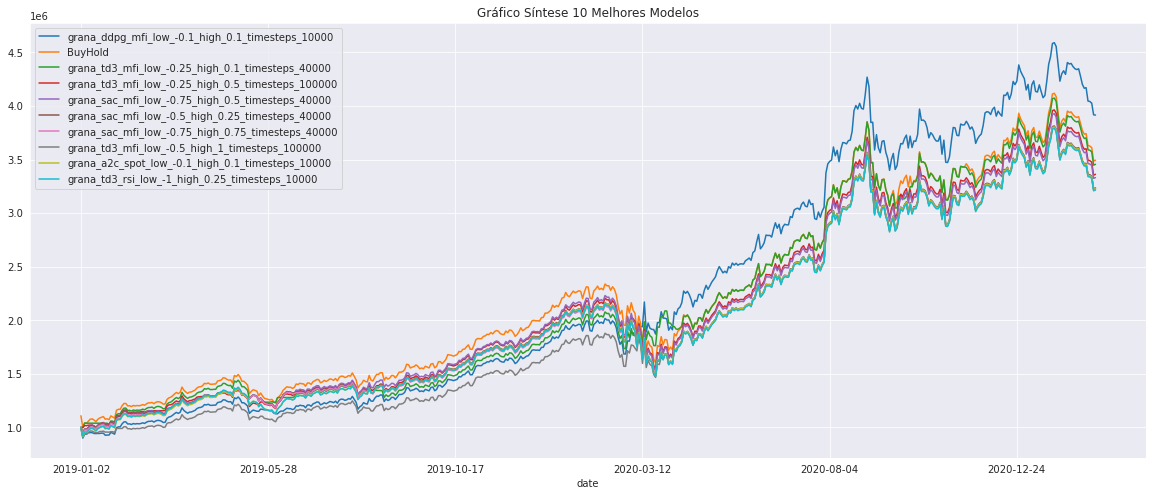

In [5]:
resultados.plot(x='date', y=y_list.index[:10], title = 'Gráfico Síntese 10 Melhores Modelos',
        secondary_y=False,figsize=(20,8),grid=True).legend(loc='upper left')
plt.show()

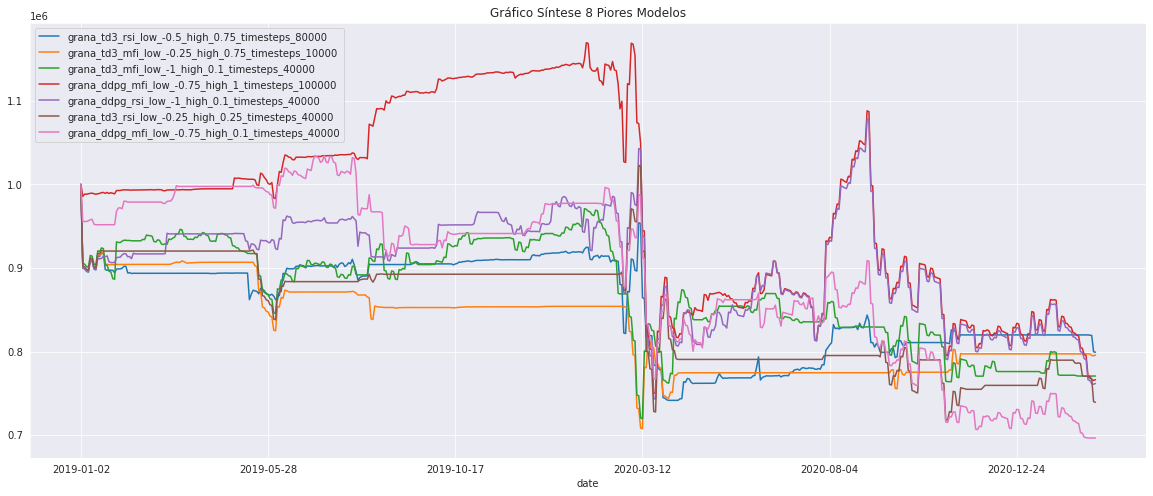

In [6]:
resultados.plot(x='date', y=y_list.index[-8:-1], title = 'Gráfico Síntese 8 Piores Modelos',
        secondary_y=False,figsize=(20,8),grid=True).legend(loc='upper left')
plt.show()

In [7]:
y_list = resultados.loc[resultados.index[-1],[col for col in [col for col in resultados.columns if 'grana'  in col] if 'mfi'  in col ] \
                        + ['BuyHold']].sort_values(ascending=False) 
print(y_list)

grana_ddpg_mfi_low_-0.1_high_0.1_timesteps_10000     3.91534e+06
BuyHold                                              3.49399e+06
grana_td3_mfi_low_-0.25_high_0.1_timesteps_40000     3.45618e+06
grana_td3_mfi_low_-0.25_high_0.5_timesteps_100000    3.36244e+06
grana_sac_mfi_low_-0.75_high_0.5_timesteps_40000     3.33229e+06
                                                        ...     
grana_sac_mfi_low_-0.1_high_0.5_timesteps_100000          799432
grana_td3_mfi_low_-0.25_high_0.75_timesteps_10000         795905
grana_td3_mfi_low_-1_high_0.1_timesteps_40000             770745
grana_ddpg_mfi_low_-0.75_high_1_timesteps_100000          766478
grana_ddpg_mfi_low_-0.75_high_0.1_timesteps_40000         696583
Name: 542, Length: 501, dtype: object


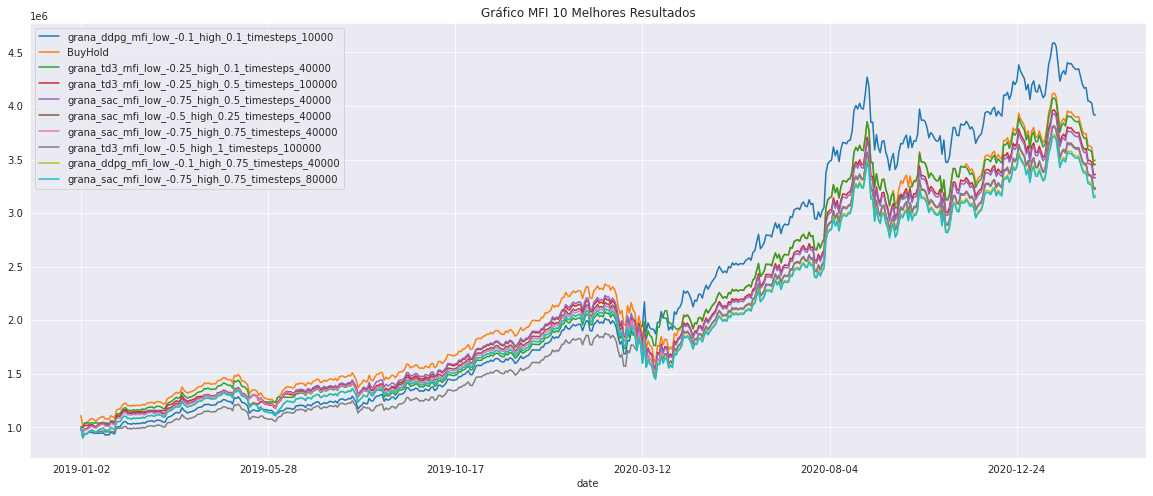

In [8]:
resultados.plot(x='date', y=y_list.index[:10], title = 'Gráfico MFI 10 Melhores Resultados',
        secondary_y=False,figsize=(20,8),grid=True).legend(loc='upper left')
plt.show()

In [9]:
y_list = resultados.loc[resultados.index[-1],[col for col in [col for col in resultados.columns if 'grana'  in col] if 'rsi'  in col ] \
                        + ['BuyHold']].sort_values(ascending=False) 
print(y_list)

BuyHold                                              3.49399e+06
grana_td3_rsi_low_-1_high_0.25_timesteps_10000       3.21572e+06
grana_td3_rsi_low_-0.25_high_0.1_timesteps_100000    3.20115e+06
grana_sac_rsi_low_-0.75_high_0.25_timesteps_80000    3.14685e+06
grana_sac_rsi_low_-0.75_high_0.5_timesteps_100000    3.14612e+06
                                                        ...     
grana_ddpg_rsi_low_-0.1_high_0.5_timesteps_40000          820631
grana_td3_rsi_low_-0.5_high_0.75_timesteps_80000          799252
grana_ddpg_rsi_low_-1_high_0.1_timesteps_40000            761831
grana_td3_rsi_low_-0.25_high_0.25_timesteps_40000         739350
grana_ddpg_rsi_low_-0.5_high_0.5_timesteps_40000          667454
Name: 542, Length: 501, dtype: object


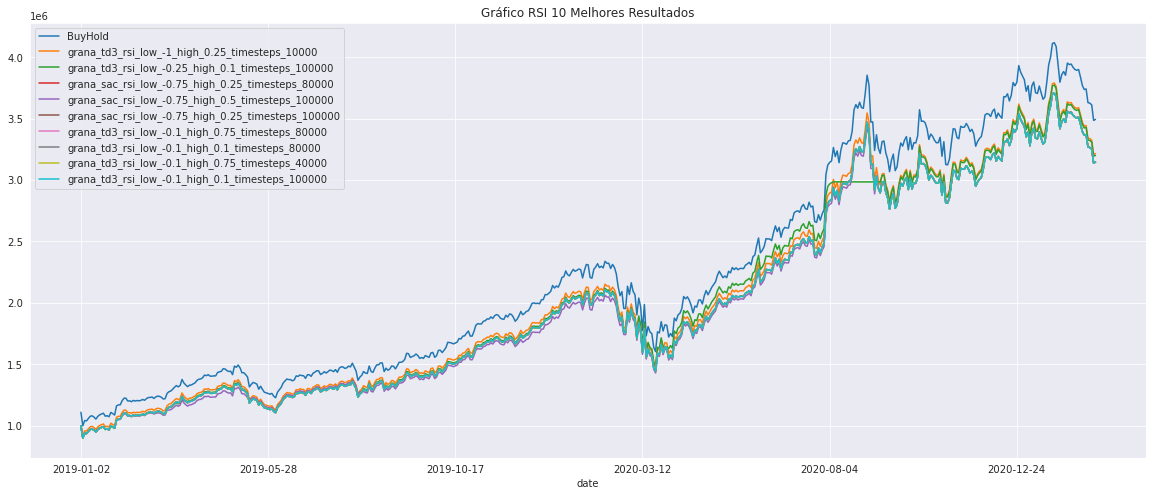

In [10]:
resultados.plot(x='date', y=y_list.index[:10], title = 'Gráfico RSI 10 Melhores Resultados',
        secondary_y=False,figsize=(20,8),grid=True).legend(loc='upper left')
plt.show()

In [11]:
y_list = resultados.loc[resultados.index[-1],[col for col in [col for col in resultados.columns if 'grana'  in col] if 'spot'  in col ] \
                        + ['BuyHold']].sort_values(ascending=False) 
print(y_list)

BuyHold                                               3.49399e+06
grana_a2c_spot_low_-0.1_high_0.1_timesteps_10000      3.22674e+06
grana_a2c_spot_low_-0.1_high_0.1_timesteps_40000      3.14714e+06
grana_a2c_spot_low_-0.1_high_0.1_timesteps_80000        3.146e+06
grana_ddpg_spot_low_-0.1_high_0.1_timesteps_40000       3.146e+06
grana_ddpg_spot_low_-0.1_high_0.1_timesteps_100000      3.146e+06
grana_a2c_spot_low_-0.1_high_0.1_timesteps_100000       3.146e+06
grana_ddpg_spot_low_-0.1_high_0.1_timesteps_10000       3.146e+06
grana_td3_spot_low_-0.1_high_0.1_timesteps_80000        3.146e+06
grana_ddpg_spot_low_-0.1_high_0.1_timesteps_80000       3.146e+06
grana_td3_spot_low_-0.1_high_0.1_timesteps_10000        3.146e+06
grana_td3_spot_low_-0.1_high_0.1_timesteps_40000        3.146e+06
grana_ppo_spot_low_-0.1_high_0.1_timesteps_100000     2.40103e+06
grana_ppo_spot_low_-0.1_high_0.1_timesteps_80000      2.35413e+06
grana_ppo_spot_low_-0.1_high_0.1_timesteps_40000      1.94582e+06
grana_sac_

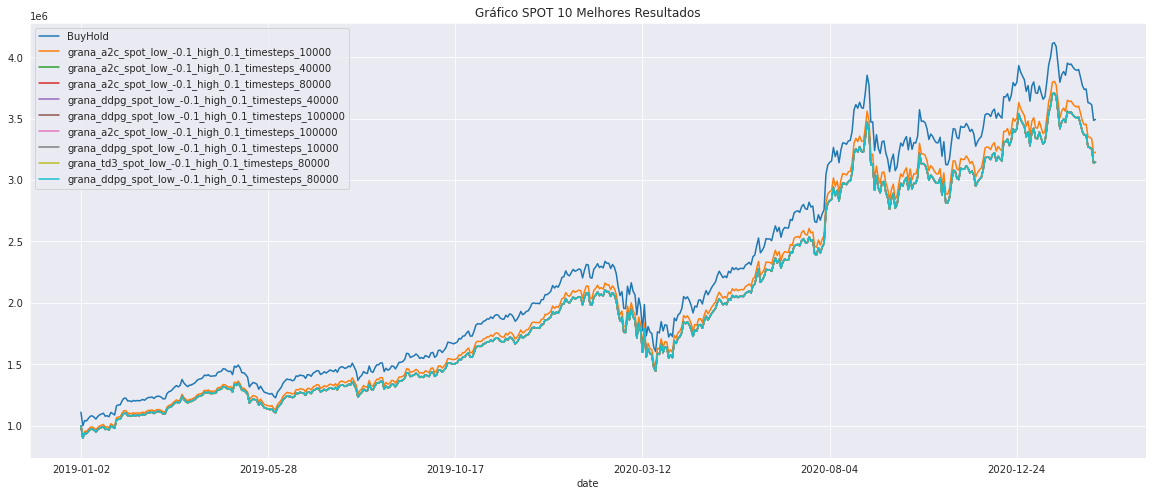

In [12]:
resultados.plot(x='date', y=y_list.index[:10], title = 'Gráfico SPOT 10 Melhores Resultados',
        secondary_y=False,figsize=(20,8),grid=True).legend(loc='upper left')
plt.show()

In [13]:
y_list = resultados.loc[resultados.index[-1],[col for col in [col for col in resultados.columns if 'grana'  in col] if 'ddpg'  in col ] \
                        + ['BuyHold']].sort_values(ascending=False) 
print(y_list)

grana_ddpg_mfi_low_-0.1_high_0.1_timesteps_10000     3.91534e+06
BuyHold                                              3.49399e+06
grana_ddpg_mfi_low_-0.1_high_0.75_timesteps_40000    3.16757e+06
grana_ddpg_mfi_low_-1_high_0.25_timesteps_100000       3.146e+06
grana_ddpg_mfi_low_-0.5_high_0.25_timesteps_40000      3.146e+06
                                                        ...     
grana_ddpg_mfi_low_-0.75_high_1_timesteps_80000           810312
grana_ddpg_mfi_low_-0.75_high_1_timesteps_100000          766478
grana_ddpg_rsi_low_-1_high_0.1_timesteps_40000            761831
grana_ddpg_mfi_low_-0.75_high_0.1_timesteps_40000         696583
grana_ddpg_rsi_low_-0.5_high_0.5_timesteps_40000          667454
Name: 542, Length: 205, dtype: object


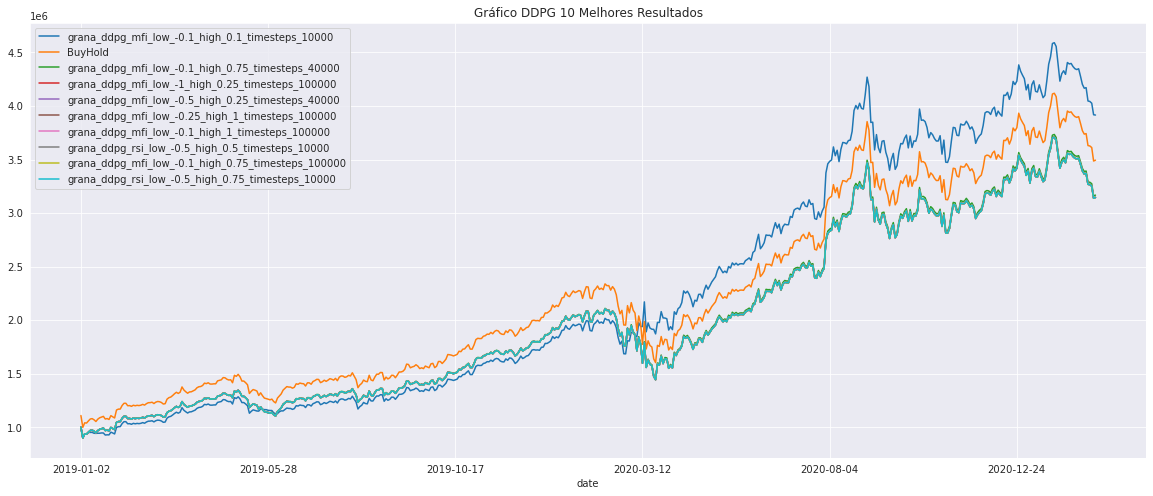

In [14]:
resultados.plot(x='date', y=y_list.index[:10], title = 'Gráfico DDPG 10 Melhores Resultados',
        secondary_y=False,figsize=(20,8),grid=True).legend(loc='upper left')
plt.show()

In [15]:
y_list = resultados.loc[resultados.index[-1],[col for col in [col for col in resultados.columns if 'grana'  in col] if 'a2c'  in col ] \
                        + ['BuyHold']].sort_values(ascending=False) 
print(y_list)

BuyHold                                              3.49399e+06
grana_a2c_spot_low_-0.1_high_0.1_timesteps_10000     3.22674e+06
grana_a2c_spot_low_-0.1_high_0.1_timesteps_40000     3.14714e+06
grana_a2c_spot_low_-0.1_high_0.1_timesteps_100000      3.146e+06
grana_a2c_spot_low_-0.1_high_0.1_timesteps_80000       3.146e+06
                                                        ...     
grana_a2c_rsi_low_-1_high_1_timesteps_80000           1.2972e+06
grana_a2c_rsi_low_-0.1_high_0.25_timesteps_10000     1.29672e+06
grana_a2c_rsi_low_-0.5_high_0.1_timesteps_80000      1.28632e+06
grana_a2c_rsi_low_-0.5_high_0.75_timesteps_80000     1.24791e+06
grana_a2c_rsi_low_-0.5_high_0.5_timesteps_80000        1.203e+06
Name: 542, Length: 205, dtype: object


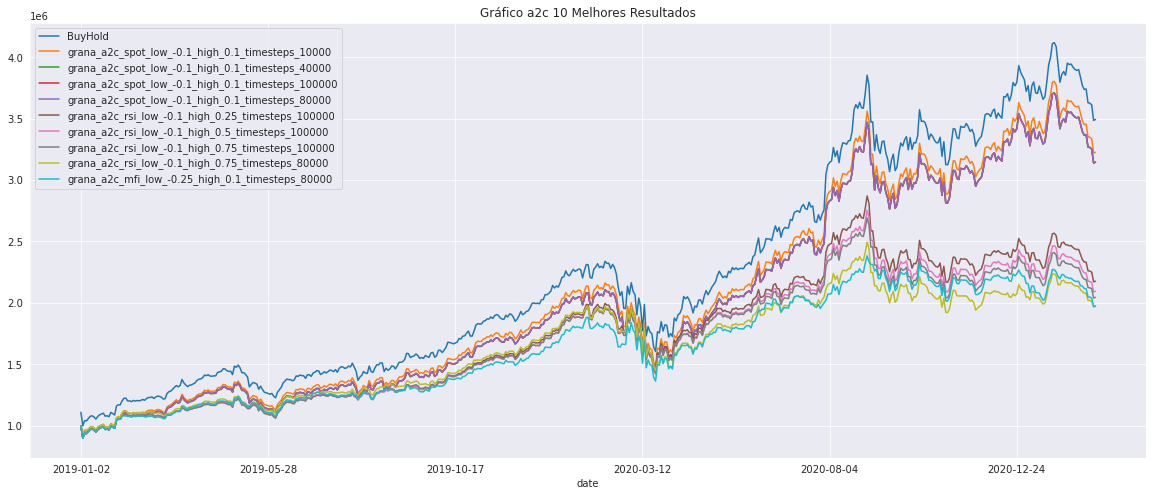

In [16]:
resultados.plot(x='date', y=y_list.index[:10], title = 'Gráfico a2c 10 Melhores Resultados',
        secondary_y=False,figsize=(20,8),grid=True).legend(loc='upper left')
plt.show()

In [17]:
y_list = resultados.loc[resultados.index[-1],[col for col in [col for col in resultados.columns if 'grana'  in col] if 'sac'  in col ] \
                        + ['BuyHold']].sort_values(ascending=False) 
print(y_list)

BuyHold                                              3.49399e+06
grana_sac_mfi_low_-0.75_high_0.5_timesteps_40000     3.33229e+06
grana_sac_mfi_low_-0.5_high_0.25_timesteps_40000     3.23536e+06
grana_sac_mfi_low_-0.75_high_0.75_timesteps_40000    3.22723e+06
grana_sac_mfi_low_-0.75_high_0.75_timesteps_80000    3.15085e+06
                                                        ...     
grana_sac_mfi_low_-0.1_high_0.25_timesteps_80000          909343
grana_sac_mfi_low_-0.1_high_1_timesteps_80000             837842
grana_sac_mfi_low_-0.1_high_1_timesteps_100000            813269
grana_sac_mfi_low_-0.1_high_0.25_timesteps_100000         807174
grana_sac_mfi_low_-0.1_high_0.5_timesteps_100000          799432
Name: 542, Length: 205, dtype: object


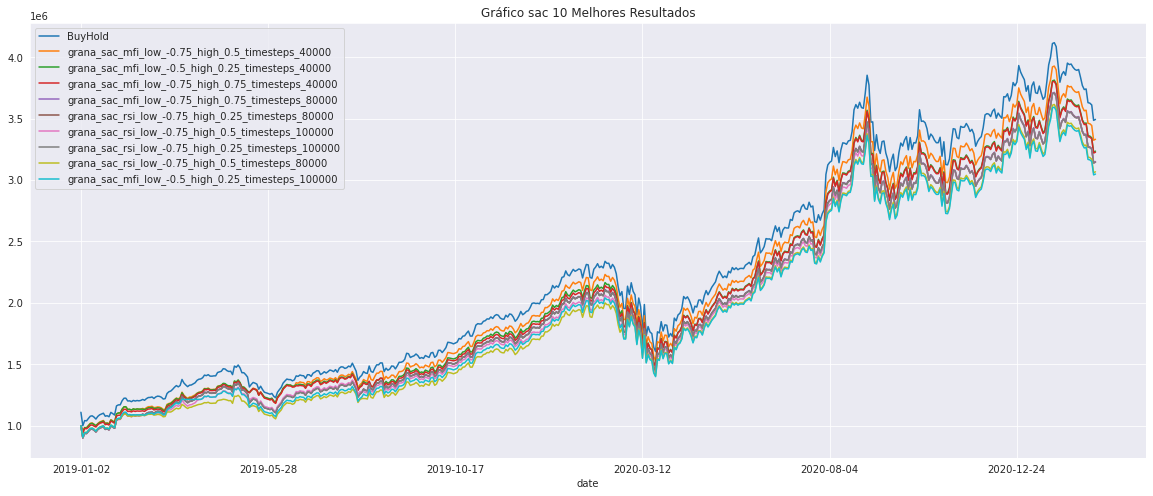

In [18]:
resultados.plot(x='date', y=y_list.index[:10], title = 'Gráfico sac 10 Melhores Resultados',
        secondary_y=False,figsize=(20,8),grid=True).legend(loc='upper left')
plt.show()

In [19]:
y_list = resultados.loc[resultados.index[-1],[col for col in [col for col in resultados.columns if 'grana'  in col] if 'td3'  in col ] \
                        + ['BuyHold']].sort_values(ascending=False) 
print(y_list)

BuyHold                                              3.49399e+06
grana_td3_mfi_low_-0.25_high_0.1_timesteps_40000     3.45618e+06
grana_td3_mfi_low_-0.25_high_0.5_timesteps_100000    3.36244e+06
grana_td3_mfi_low_-0.5_high_1_timesteps_100000       3.22702e+06
grana_td3_rsi_low_-1_high_0.25_timesteps_10000       3.21572e+06
                                                        ...     
grana_td3_rsi_low_-1_high_0.5_timesteps_80000             850069
grana_td3_rsi_low_-0.5_high_0.75_timesteps_80000          799252
grana_td3_mfi_low_-0.25_high_0.75_timesteps_10000         795905
grana_td3_mfi_low_-1_high_0.1_timesteps_40000             770745
grana_td3_rsi_low_-0.25_high_0.25_timesteps_40000         739350
Name: 542, Length: 205, dtype: object


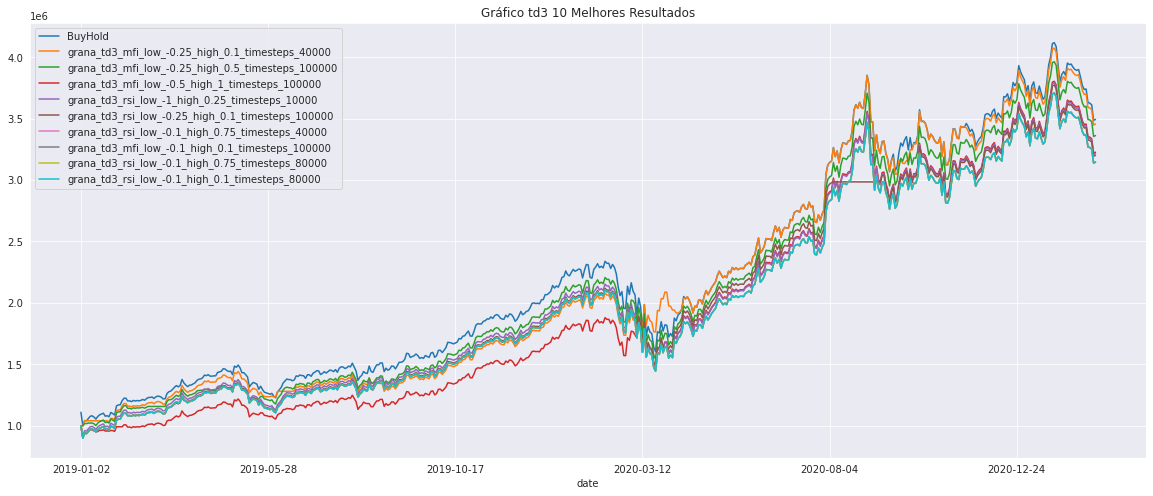

In [20]:
resultados.plot(x='date', y=y_list.index[:10], title = 'Gráfico td3 10 Melhores Resultados',
        secondary_y=False,figsize=(20,8),grid=True).legend(loc='upper left')
plt.show()